<a href="https://colab.research.google.com/github/Anindya-Paul07/colab_notebook_machine/blob/main/fcc_MAGIC_tryout.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

In [3]:
cols = ["fLength", "fWidth", "fSize", "fConc", "fConc1", "fAsym","fM3Long","fM3Trans","fAlpha","fDist","class" ]

df = pd.read_csv("magic04.data", names=cols)
df.head(6)

fLength    fWidth   fSize   fConc  fConc1     fAsym  fM3Long  fM3Trans  \
0   28.7967   16.0021  2.6449  0.3918  0.1982   27.7004  22.0110   -8.2027   
1   31.6036   11.7235  2.5185  0.5303  0.3773   26.2722  23.8238   -9.9574   
2  162.0520  136.0310  4.0612  0.0374  0.0187  116.7410 -64.8580  -45.2160   
3   23.8172    9.5728  2.3385  0.6147  0.3922   27.2107  -6.4633   -7.1513   
4   75.1362   30.9205  3.1611  0.3168  0.1832   -5.5277  28.5525   21.8393   
5   51.6240   21.1502  2.9085  0.2420  0.1340   50.8761  43.1887    9.8145   

    fAlpha     fDist class  
0  40.0920   81.8828     g  
1   6.3609  205.2610     g  
2  76.9600  256.7880     g  
3  10.4490  116.7370     g  
4   4.6480  356.4620     g  
5   3.6130  238.0980     g

In [4]:
df["class"] = (df['class'] == 'g').astype(int)

In [5]:
df.head()

fLength    fWidth   fSize   fConc  fConc1     fAsym  fM3Long  fM3Trans  \
0   28.7967   16.0021  2.6449  0.3918  0.1982   27.7004  22.0110   -8.2027   
1   31.6036   11.7235  2.5185  0.5303  0.3773   26.2722  23.8238   -9.9574   
2  162.0520  136.0310  4.0612  0.0374  0.0187  116.7410 -64.8580  -45.2160   
3   23.8172    9.5728  2.3385  0.6147  0.3922   27.2107  -6.4633   -7.1513   
4   75.1362   30.9205  3.1611  0.3168  0.1832   -5.5277  28.5525   21.8393   

    fAlpha     fDist  class  
0  40.0920   81.8828      1  
1   6.3609  205.2610      1  
2  76.9600  256.7880      1  
3  10.4490  116.7370      1  
4   4.6480  356.4620      1

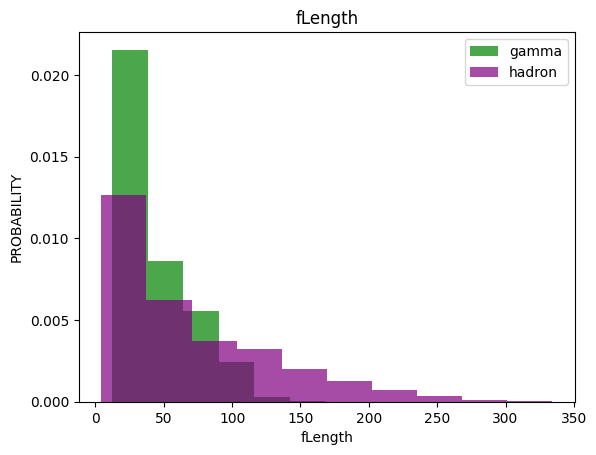

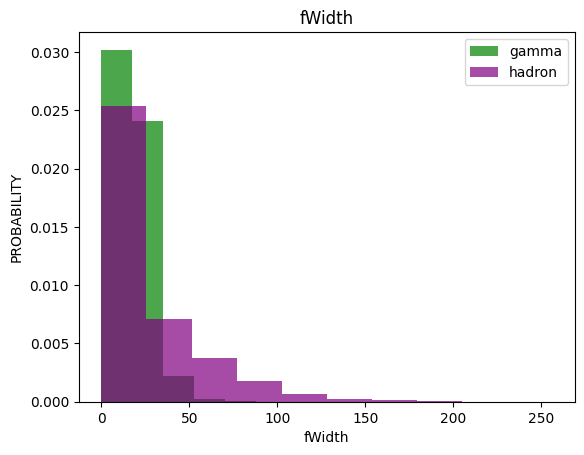

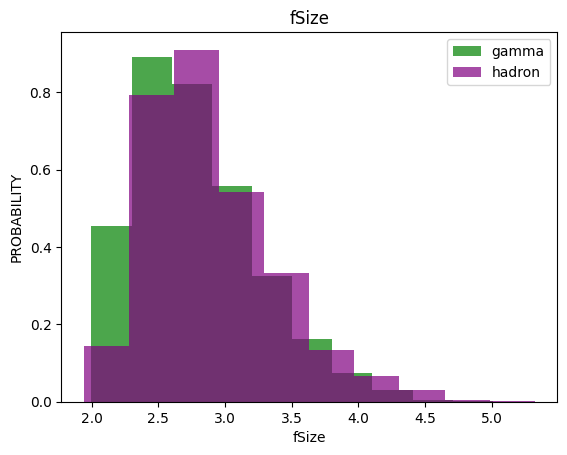

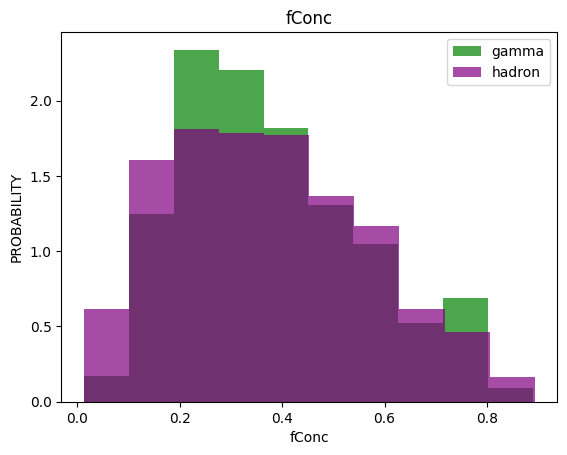

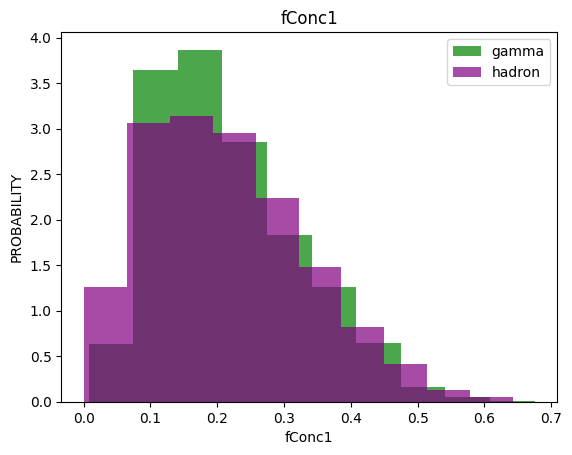

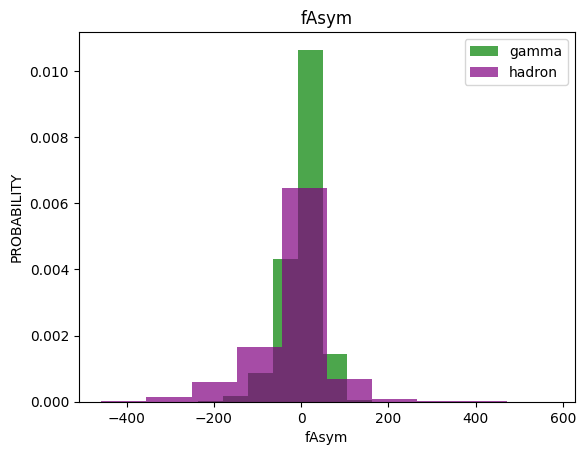

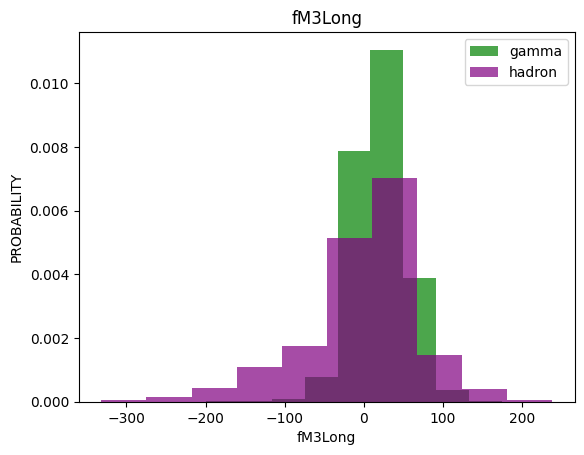

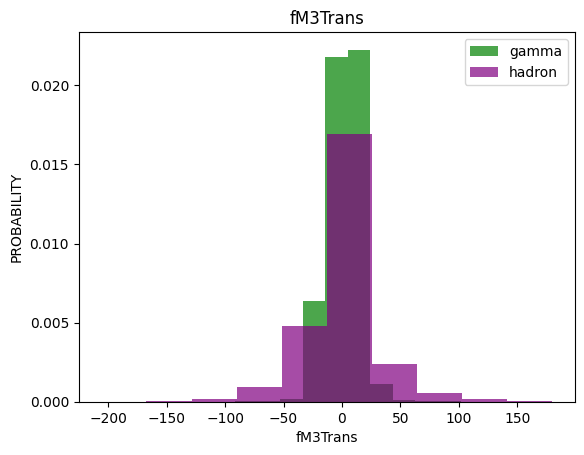

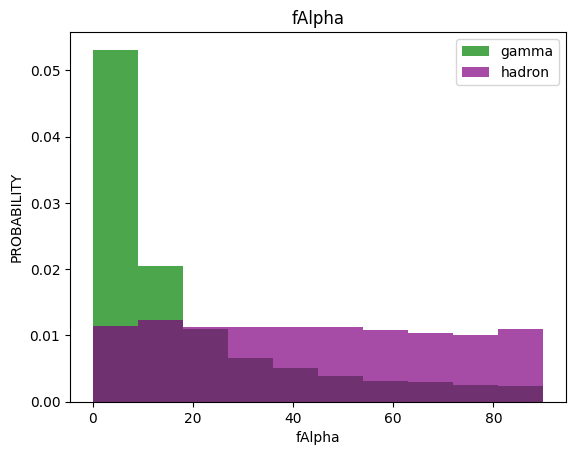

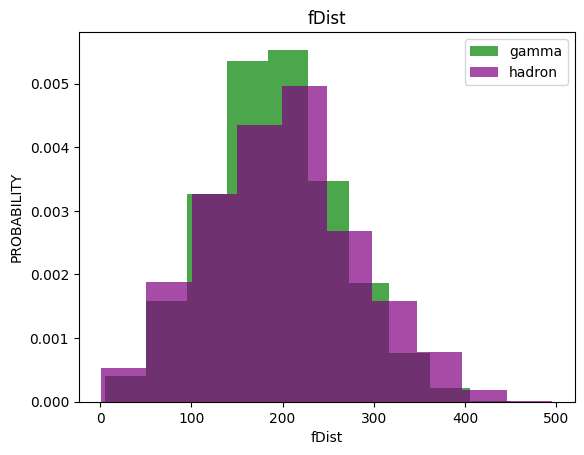

In [6]:
for label in cols[: -1]:
  plt.hist(df[df["class"] == 1][label], color="green", label="gamma", alpha=0.7, density=True)
  plt.hist(df[df["class"] == 0][label], color="purple", label="hadron", alpha=0.7, density=True)
  plt.title(label)
  plt.ylabel("PROBABILITY")
  plt.xlabel(label)
  plt.legend()
  plt.show()

#Train, Validation, Test Datasets

In [7]:
train, valid, test = np.split(df.sample(frac=1), [int(0.6*len(df)), int(0.8*len(df))])

/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:57: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [8]:
def scale_datasets(dataframe, oversample=False):
  x = dataframe[dataframe.columns[:-1]].values
  y = dataframe[dataframe.columns[-1]].values

  scaler = StandardScaler()
  x = scaler.fit_transform(x)

  if oversample:
    ros = RandomOverSampler()
    x, y = ros.fit_resample(x, y)

  data = np.hstack((x, np.reshape(y, (-1, 1))))

  return data, x, y

In [9]:
train, x_train, y_train = scale_datasets(train, oversample=True)
valid, x_valid, y_valid = scale_datasets(valid, oversample=False)
test, x_test, y_test = scale_datasets(test, oversample=False)

#kNN

In [10]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [11]:
Knn_model = KNeighborsClassifier(n_neighbors=5)
Knn_model.fit(x_train, y_train)

KNeighborsClassifier()

In [12]:
y_pred = Knn_model.predict(x_test)

In [13]:
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.74      0.75      0.75      1279
           1       0.87      0.87      0.87      2525

    accuracy                           0.83      3804
   macro avg       0.81      0.81      0.81      3804
weighted avg       0.83      0.83      0.83      3804



#Naive Bayes

In [14]:
from sklearn.naive_bayes import GaussianNB

In [15]:
naive_model = GaussianNB()
nb_model = naive_model.fit(x_train, y_train)

In [16]:
y_pred = nb_model.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.67      0.42      0.52      1302
           1       0.75      0.89      0.81      2502

    accuracy                           0.73      3804
   macro avg       0.71      0.66      0.67      3804
weighted avg       0.72      0.73      0.71      3804



#Logistic Regression

In [17]:
from sklearn.linear_model import LogisticRegression

In [18]:
log_model = LogisticRegression()
lg_model = log_model.fit(x_train, y_train)

In [19]:
y_pred = lg_model.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.67      0.72      0.69      1302
           1       0.85      0.82      0.83      2502

    accuracy                           0.78      3804
   macro avg       0.76      0.77      0.76      3804
weighted avg       0.79      0.78      0.79      3804



#Support Vector Machine

In [20]:
from sklearn.svm import SVC

In [21]:
svm_model = SVC()
svm_model= svm_model.fit(x_train, y_train)

In [22]:
y_pred = svm_model.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.78      0.80      1302
           1       0.89      0.91      0.90      2502

    accuracy                           0.87      3804
   macro avg       0.86      0.85      0.85      3804
weighted avg       0.87      0.87      0.87      3804



#Neural Networks

In [23]:
import tensorflow as tf

In [24]:
def plot_history(history):
  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
  ax1.plot(history.history['loss'], label='loss')
  ax1.plot(history.history['val_loss'], label='val_loss')
  ax1.set_xlabel('Epoch')
  ax1.set_ylabel('Binary-crossentropy')
  ax1.grid(True)

  ax2.plot(history.history['accuracy'], label='accuracy')
  ax2.plot(history.history['val_accuracy'], label='val_accuracy')
  ax2.set_xlabel('Epoch')
  ax2.set_ylabel('Accuracy')
  ax2.grid(True)

  plt.show()

In [ ]:
nn_model = tf.keras.Sequential([
    tf.keras.layers.Dense(32, activation='relu', input_shape=(10,)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

nn_model.compile(optimizer=tf.keras.optimizers.Adamax(0.001), loss='binary_crossentropy',
                 metrics=['accuracy'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
history = nn_model.fit(x_train, y_train, epochs=100, batch_size=32, validation_data=(x_valid, y_valid), verbose=0)

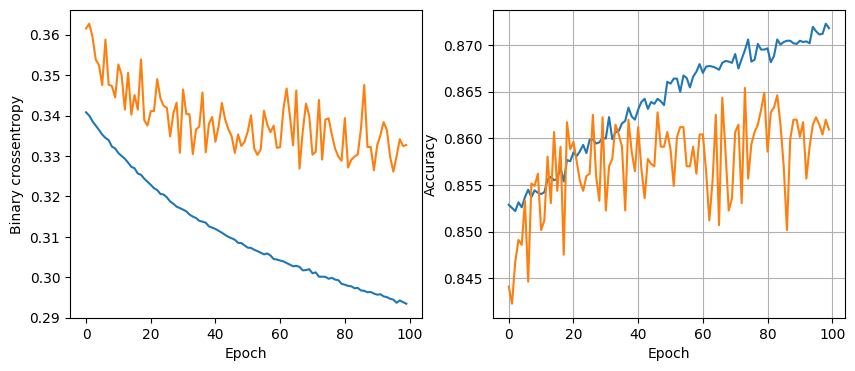

In [ ]:
plot_history(history)

#Making it Trainning Function

In [25]:
def train_model(x_train, y_train, num_node, dropout_prob, lr, batch_size, epochs):
  nn_model = tf.keras.Sequential([
    tf.keras.layers.Dense(num_node, activation='relu', input_shape=(10,)),
    tf.keras.layers.Dropout(dropout_prob),
    tf.keras.layers.Dense(num_node, activation='relu'),
    tf.keras.layers.Dropout(dropout_prob),
    tf.keras.layers.Dense(1, activation='sigmoid')
  ])

  nn_model.compile(optimizer=tf.keras.optimizers.Adamax(lr), loss='binary_crossentropy',
                  metrics=['accuracy'])
  history = nn_model.fit(
      x_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(x_valid, y_valid), verbose=0
      )
  return nn_model, history

Training model with 16 nodes Dropout Probabilty 0 Learninh Rate 0.01 Batch Size 32


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


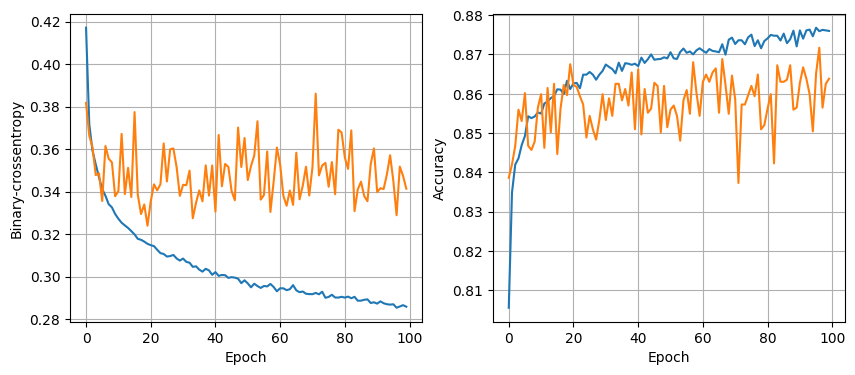

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8653 - loss: 0.3307
Training model with 16 nodes Dropout Probabilty 0 Learninh Rate 0.01 Batch Size 64


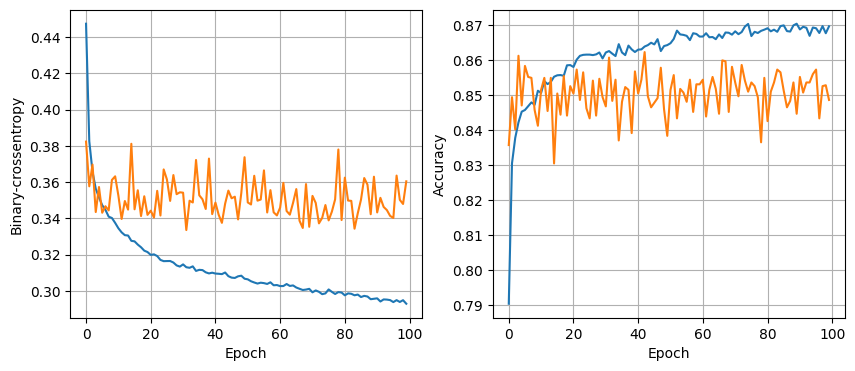

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8495 - loss: 0.3544
Training model with 16 nodes Dropout Probabilty 0 Learninh Rate 0.01 Batch Size 128


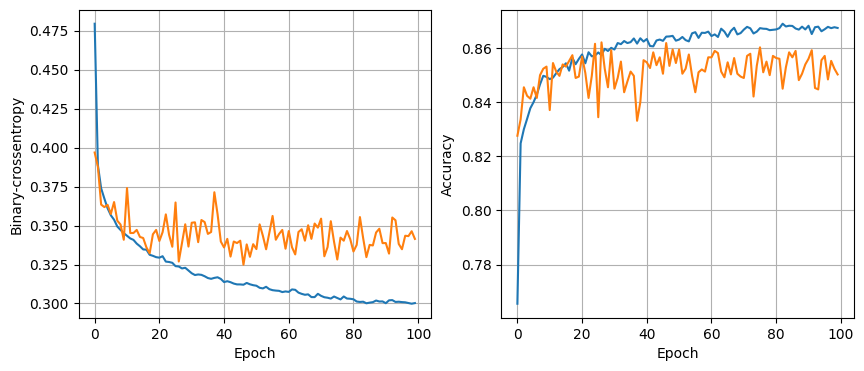

119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8575 - loss: 0.3381
Training model with 16 nodes Dropout Probabilty 0 Learninh Rate 0.005 Batch Size 32


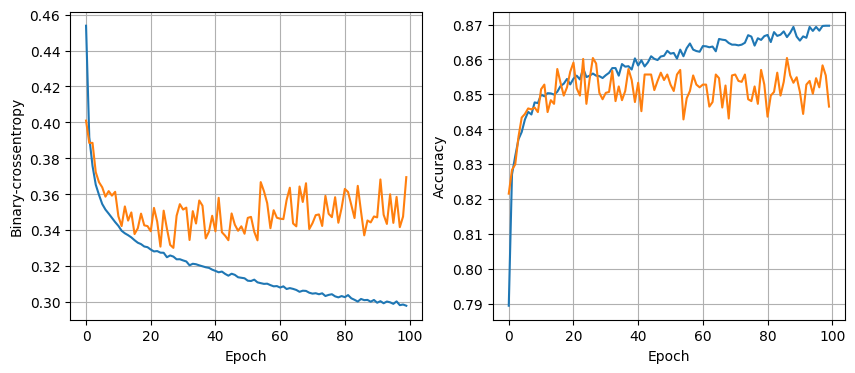

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8485 - loss: 0.3610
Training model with 16 nodes Dropout Probabilty 0 Learninh Rate 0.005 Batch Size 64


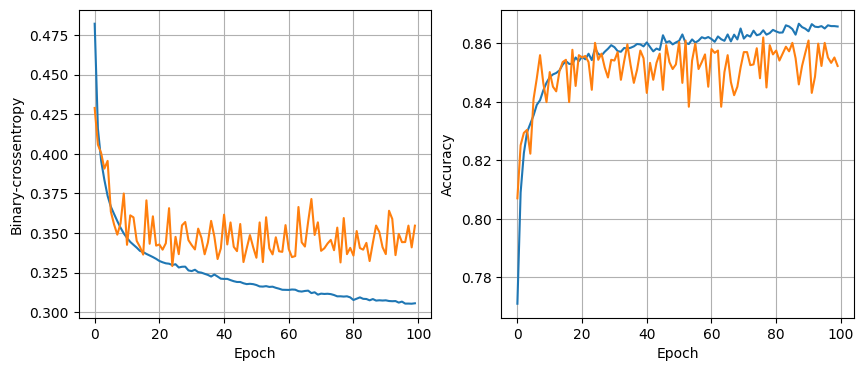

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8556 - loss: 0.3462
Training model with 16 nodes Dropout Probabilty 0 Learninh Rate 0.005 Batch Size 128


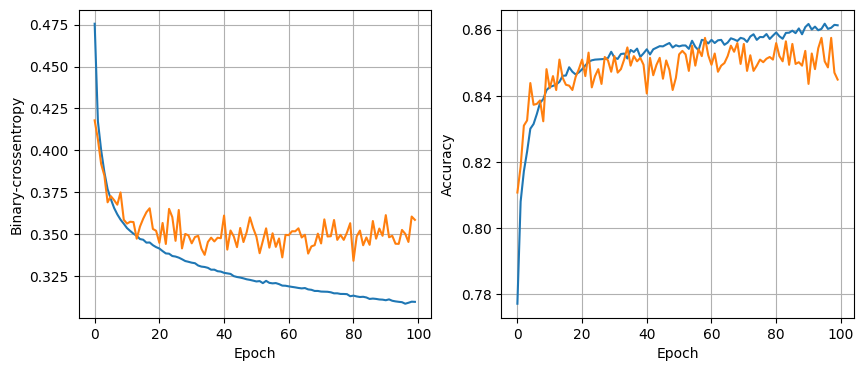

119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8459 - loss: 0.3535
Training model with 16 nodes Dropout Probabilty 0 Learninh Rate 0.001 Batch Size 32


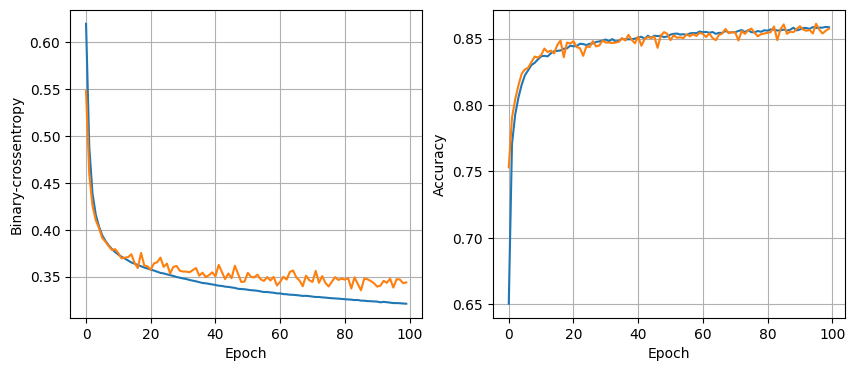

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8603 - loss: 0.3356
Training model with 16 nodes Dropout Probabilty 0 Learninh Rate 0.001 Batch Size 64


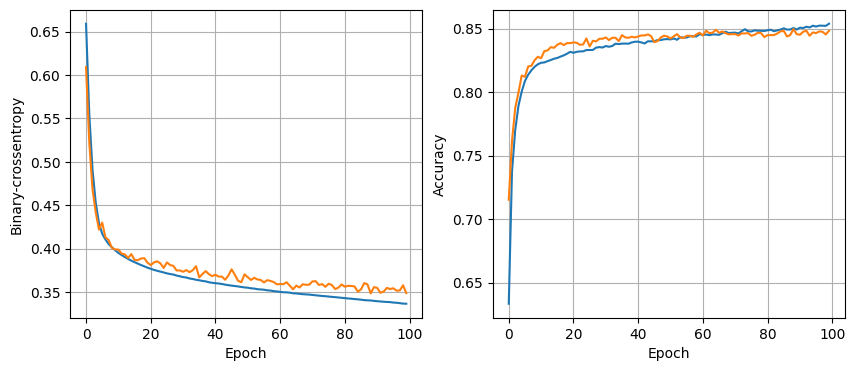

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8499 - loss: 0.3447
Training model with 16 nodes Dropout Probabilty 0 Learninh Rate 0.001 Batch Size 128


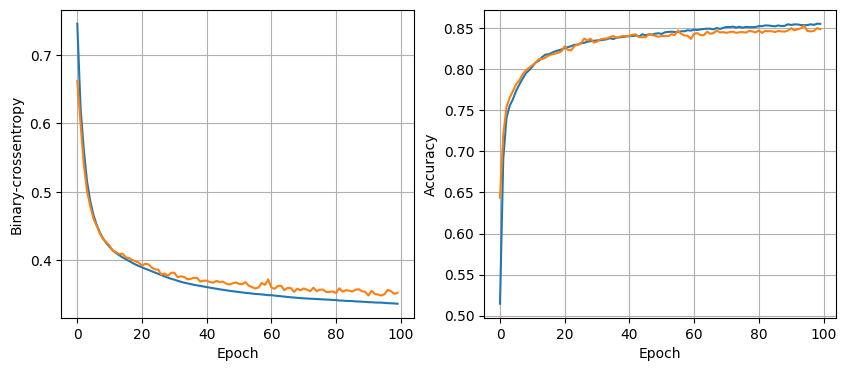

119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8488 - loss: 0.3516
Training model with 16 nodes Dropout Probabilty 0.2 Learninh Rate 0.01 Batch Size 32


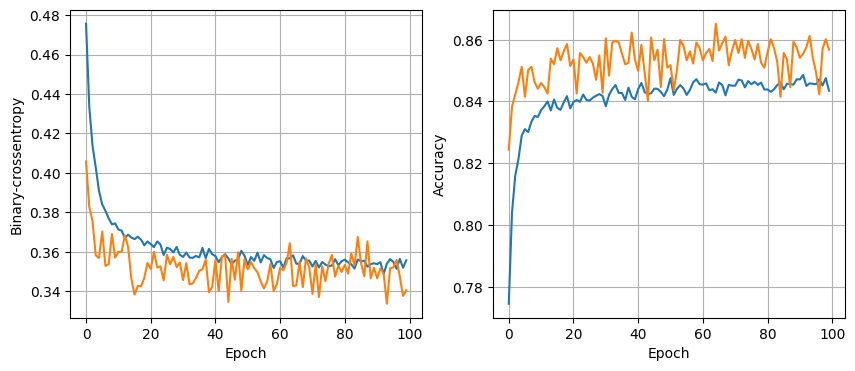

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8546 - loss: 0.3383
Training model with 16 nodes Dropout Probabilty 0.2 Learninh Rate 0.01 Batch Size 64


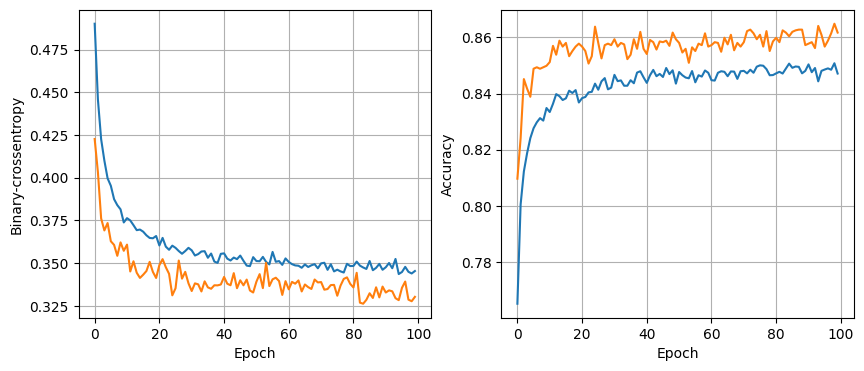

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8651 - loss: 0.3256
Training model with 16 nodes Dropout Probabilty 0.2 Learninh Rate 0.01 Batch Size 128


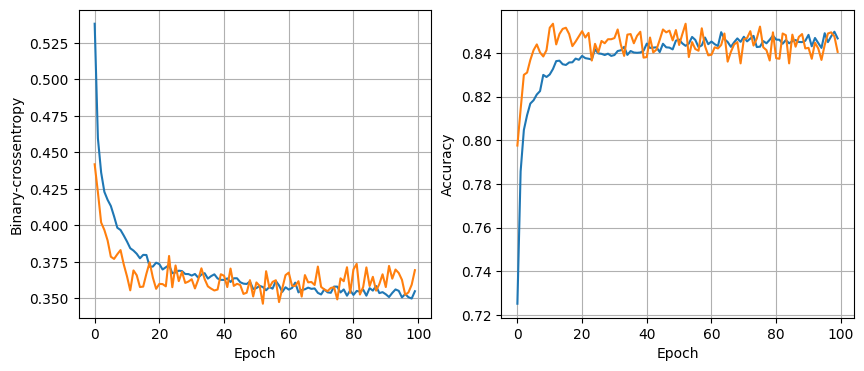

119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8464 - loss: 0.3658
Training model with 16 nodes Dropout Probabilty 0.2 Learninh Rate 0.005 Batch Size 32


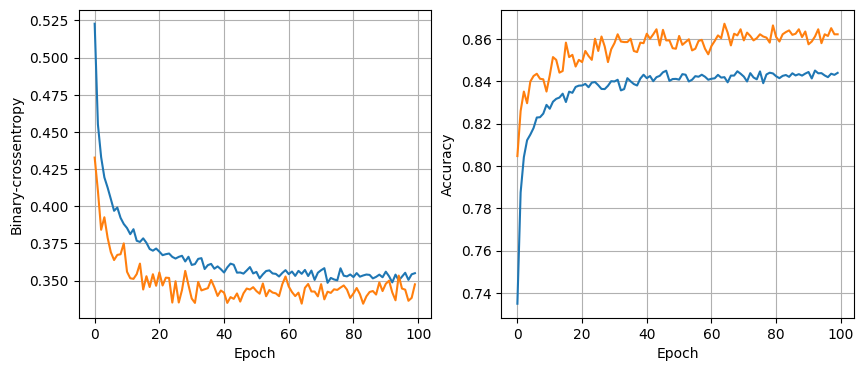

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8634 - loss: 0.3456
Training model with 16 nodes Dropout Probabilty 0.2 Learninh Rate 0.005 Batch Size 64


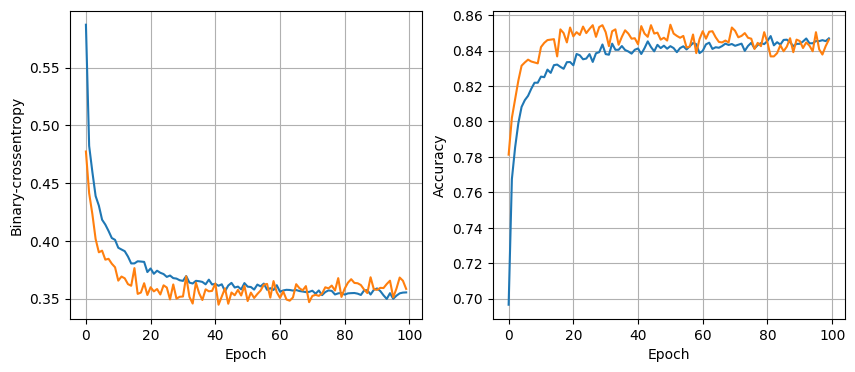

119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8494 - loss: 0.3558
Training model with 16 nodes Dropout Probabilty 0.2 Learninh Rate 0.005 Batch Size 128


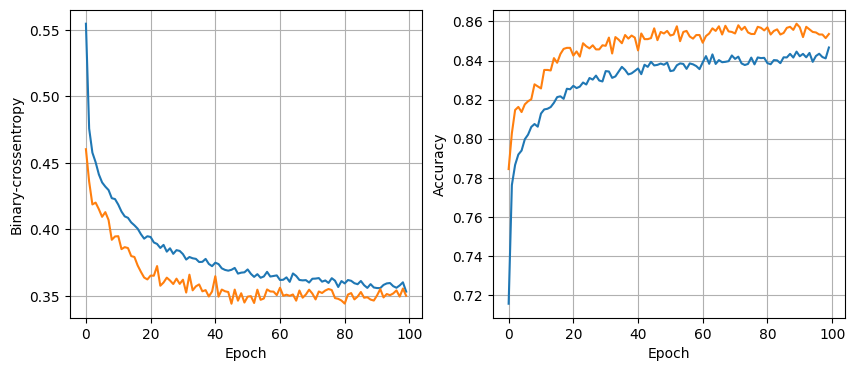

119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8547 - loss: 0.3483
Training model with 16 nodes Dropout Probabilty 0.2 Learninh Rate 0.001 Batch Size 32


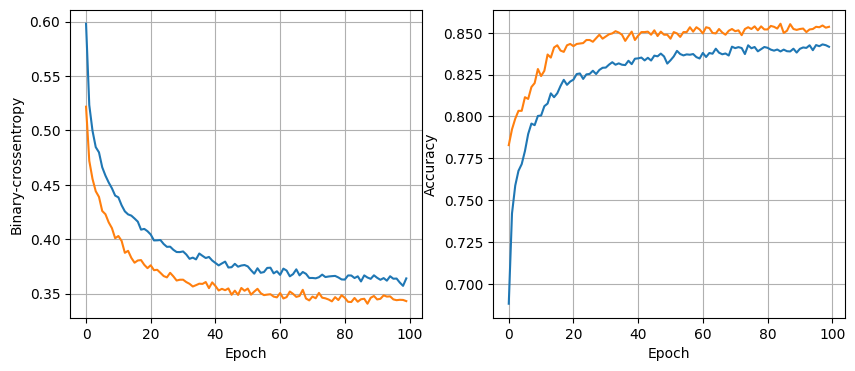

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8533 - loss: 0.3419
Training model with 16 nodes Dropout Probabilty 0.2 Learninh Rate 0.001 Batch Size 64


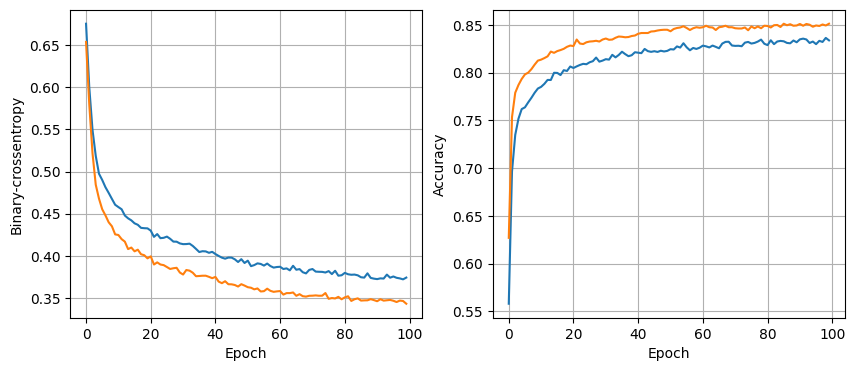

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8496 - loss: 0.3433
Training model with 16 nodes Dropout Probabilty 0.2 Learninh Rate 0.001 Batch Size 128


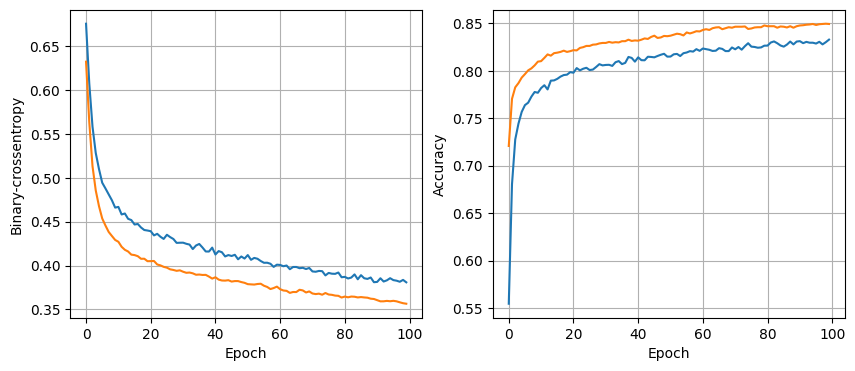

119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8527 - loss: 0.3585
Training model with 32 nodes Dropout Probabilty 0 Learninh Rate 0.01 Batch Size 32


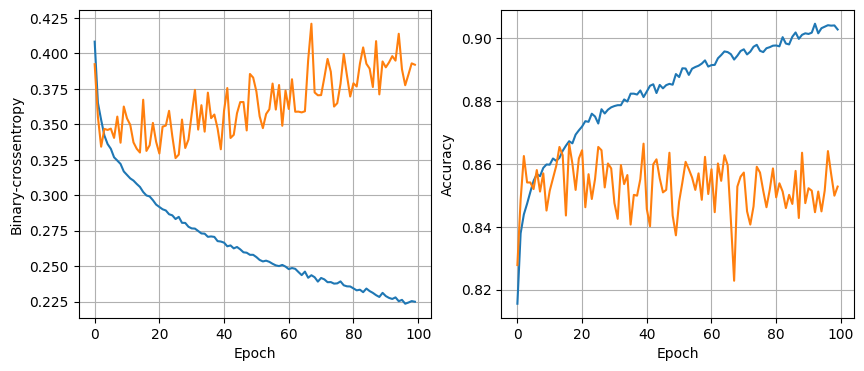

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8531 - loss: 0.3833
Training model with 32 nodes Dropout Probabilty 0 Learninh Rate 0.01 Batch Size 64


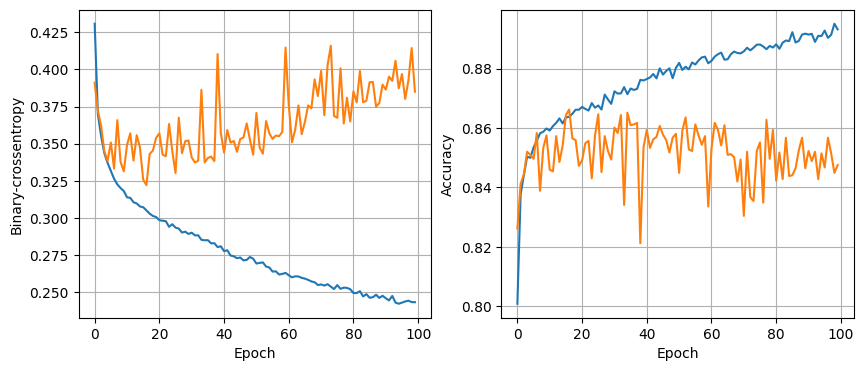

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8482 - loss: 0.3811
Training model with 32 nodes Dropout Probabilty 0 Learninh Rate 0.01 Batch Size 128


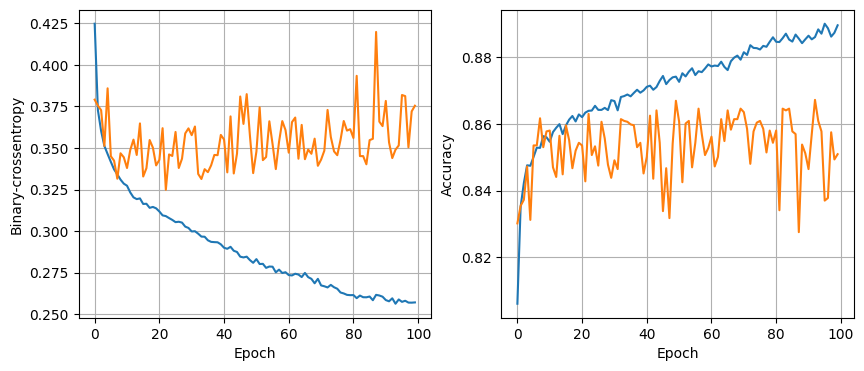

119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8547 - loss: 0.3665
Training model with 32 nodes Dropout Probabilty 0 Learninh Rate 0.005 Batch Size 32


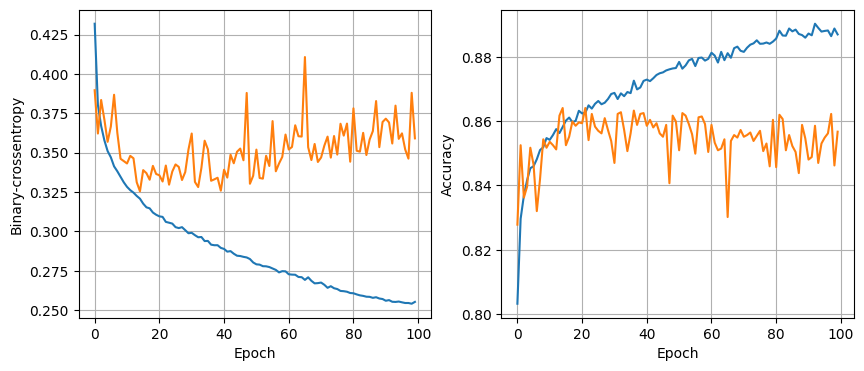

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8611 - loss: 0.3496
Training model with 32 nodes Dropout Probabilty 0 Learninh Rate 0.005 Batch Size 64


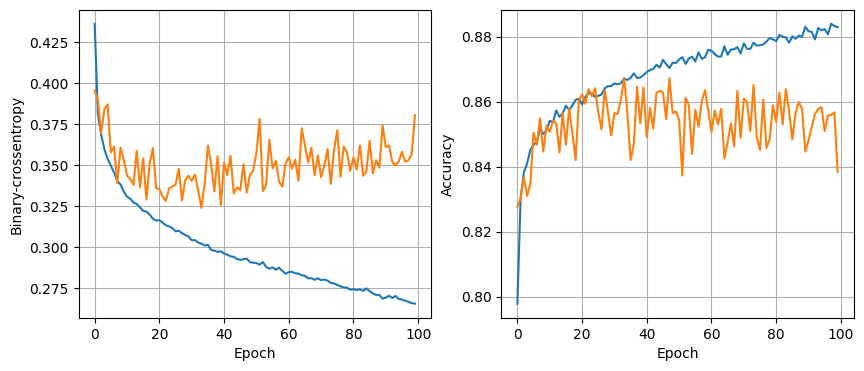

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8418 - loss: 0.3768
Training model with 32 nodes Dropout Probabilty 0 Learninh Rate 0.005 Batch Size 128


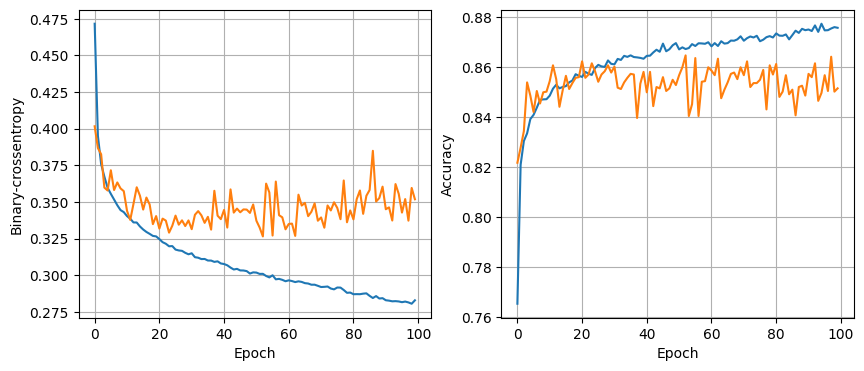

119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8548 - loss: 0.3354
Training model with 32 nodes Dropout Probabilty 0 Learninh Rate 0.001 Batch Size 32


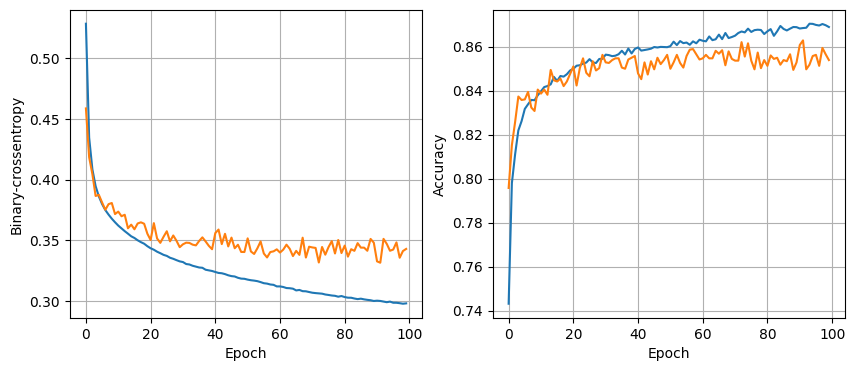

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8530 - loss: 0.3407
Training model with 32 nodes Dropout Probabilty 0 Learninh Rate 0.001 Batch Size 64


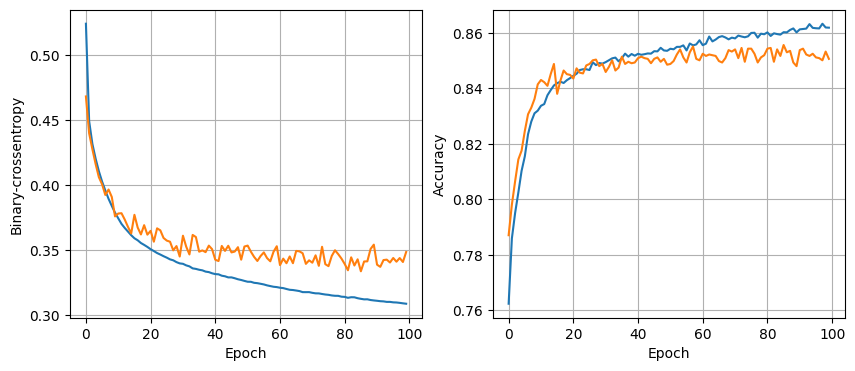

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8529 - loss: 0.3403
Training model with 32 nodes Dropout Probabilty 0 Learninh Rate 0.001 Batch Size 128


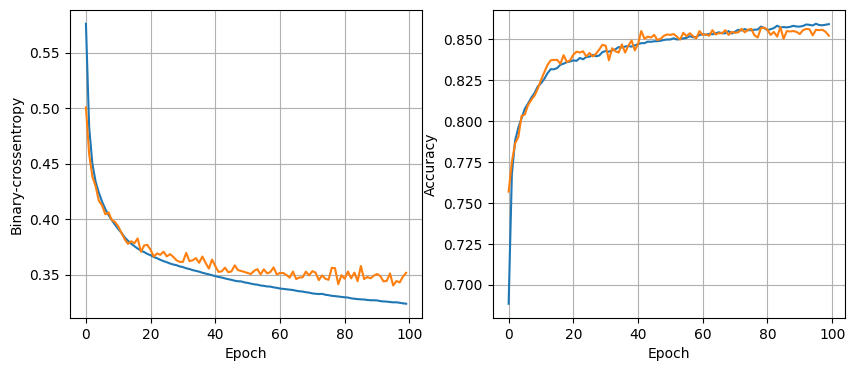

119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8539 - loss: 0.3449
Training model with 32 nodes Dropout Probabilty 0.2 Learninh Rate 0.01 Batch Size 32


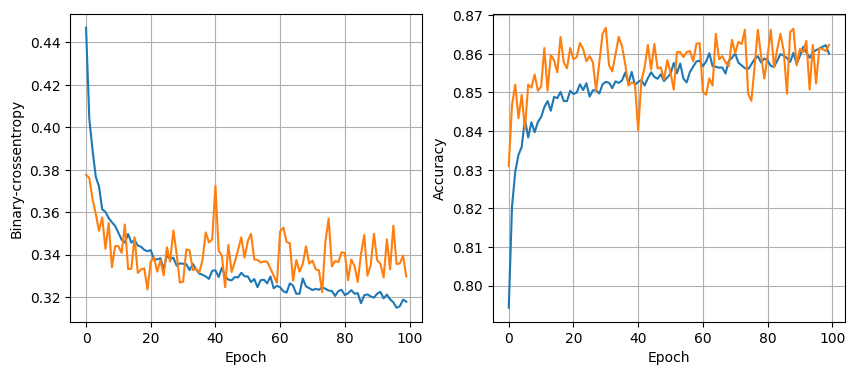

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8589 - loss: 0.3267
Training model with 32 nodes Dropout Probabilty 0.2 Learninh Rate 0.01 Batch Size 64


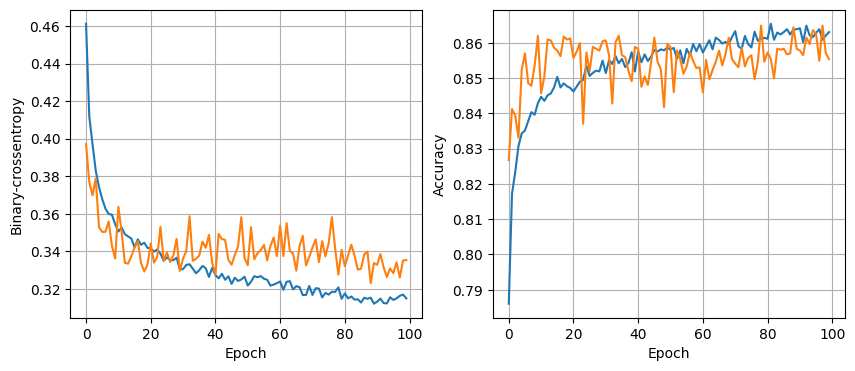

119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8530 - loss: 0.3308
Training model with 32 nodes Dropout Probabilty 0.2 Learninh Rate 0.01 Batch Size 128


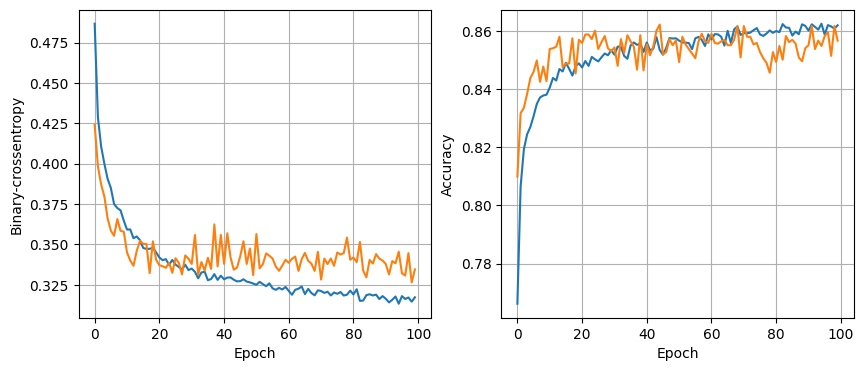

119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8610 - loss: 0.3302
Training model with 32 nodes Dropout Probabilty 0.2 Learninh Rate 0.005 Batch Size 32


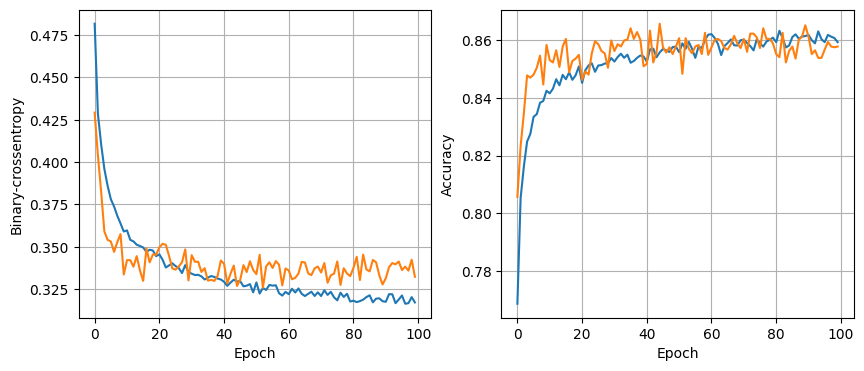

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8576 - loss: 0.3235
Training model with 32 nodes Dropout Probabilty 0.2 Learninh Rate 0.005 Batch Size 64


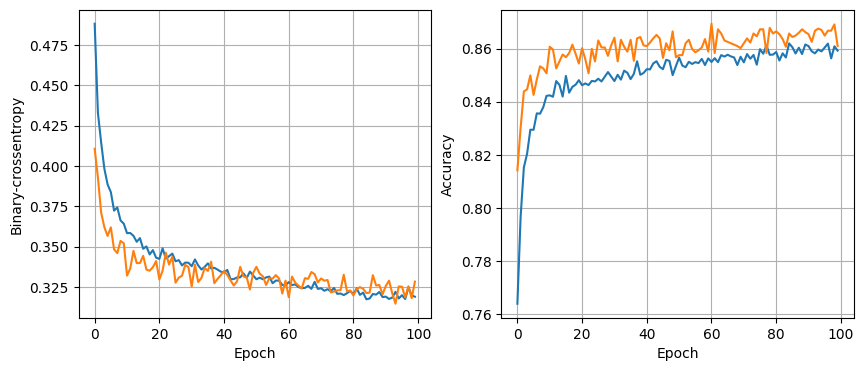

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8596 - loss: 0.3216
Training model with 32 nodes Dropout Probabilty 0.2 Learninh Rate 0.005 Batch Size 128


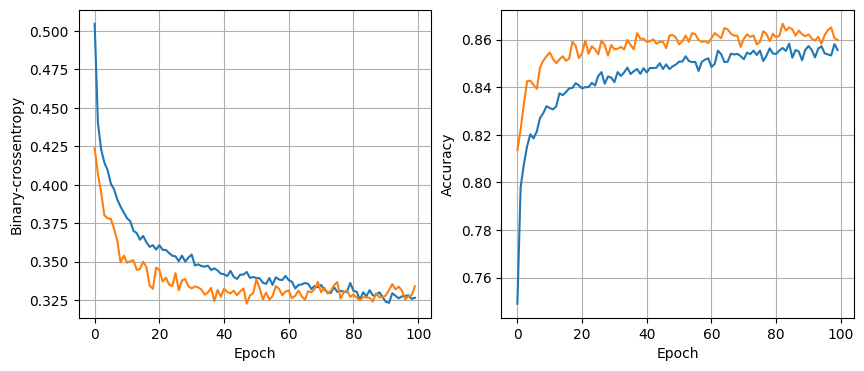

119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8648 - loss: 0.3312
Training model with 32 nodes Dropout Probabilty 0.2 Learninh Rate 0.001 Batch Size 32


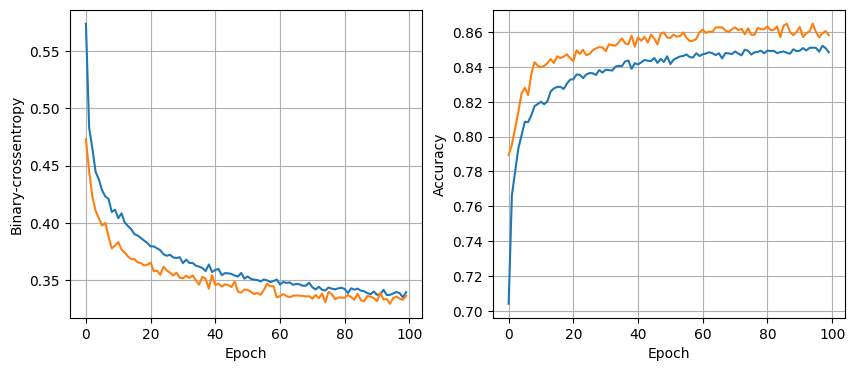

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8611 - loss: 0.3300
Training model with 32 nodes Dropout Probabilty 0.2 Learninh Rate 0.001 Batch Size 64


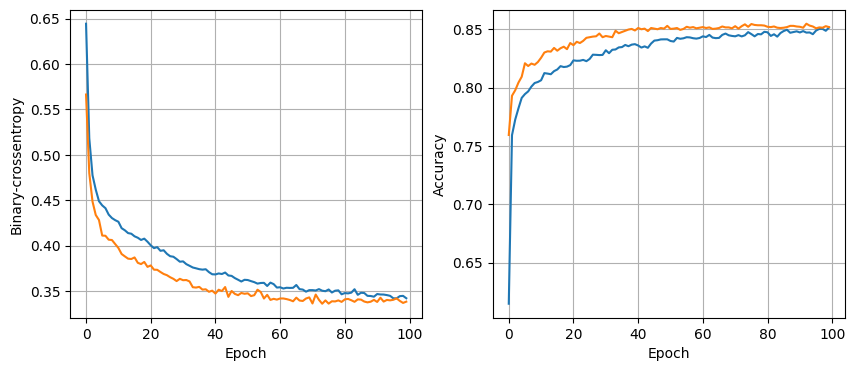

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8573 - loss: 0.3319
Training model with 32 nodes Dropout Probabilty 0.2 Learninh Rate 0.001 Batch Size 128


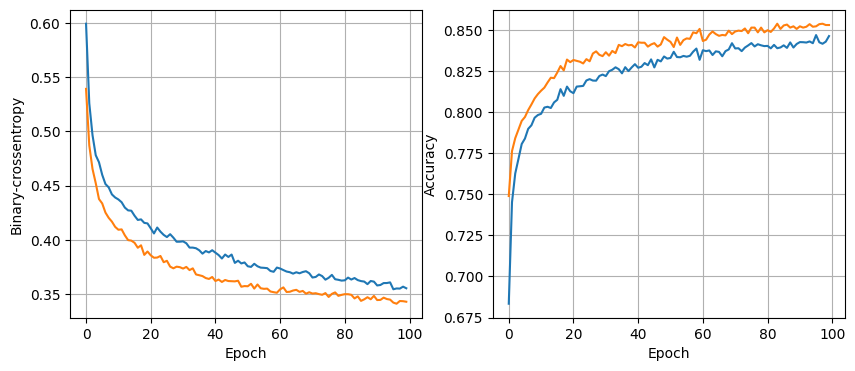

119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8554 - loss: 0.3386
Training model with 64 nodes Dropout Probabilty 0 Learninh Rate 0.01 Batch Size 32


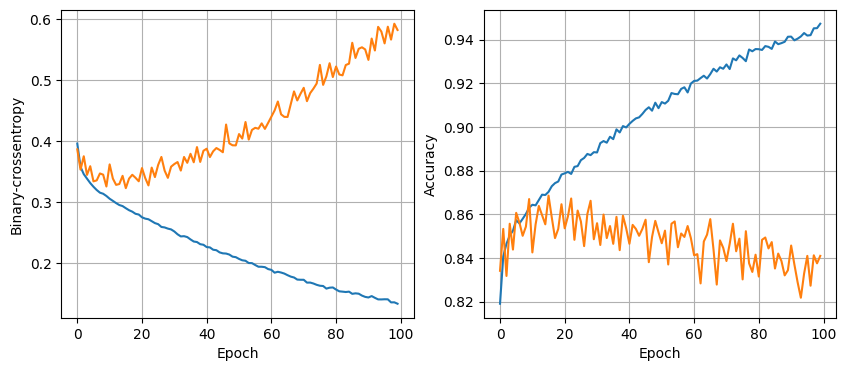

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8417 - loss: 0.5932
Training model with 64 nodes Dropout Probabilty 0 Learninh Rate 0.01 Batch Size 64


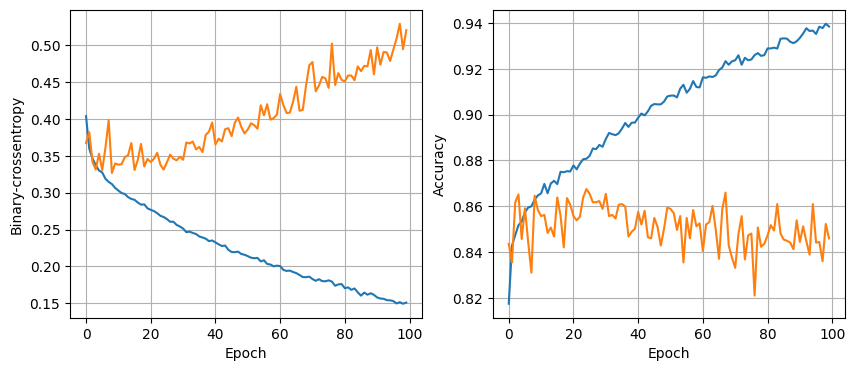

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8455 - loss: 0.4992
Training model with 64 nodes Dropout Probabilty 0 Learninh Rate 0.01 Batch Size 128


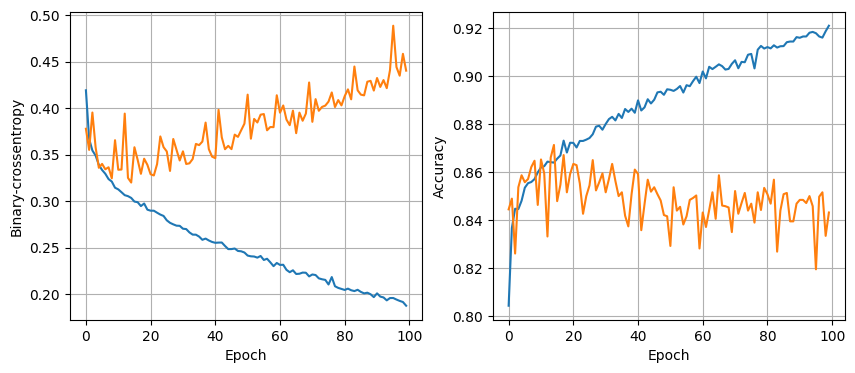

119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8443 - loss: 0.4307
Training model with 64 nodes Dropout Probabilty 0 Learninh Rate 0.005 Batch Size 32


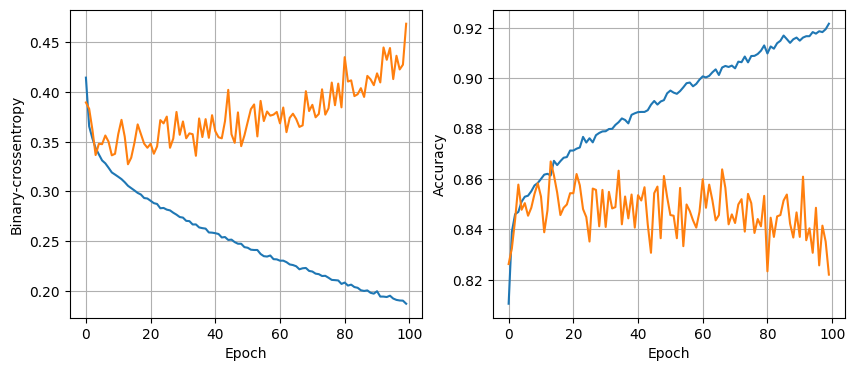

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8218 - loss: 0.4575
Training model with 64 nodes Dropout Probabilty 0 Learninh Rate 0.005 Batch Size 64


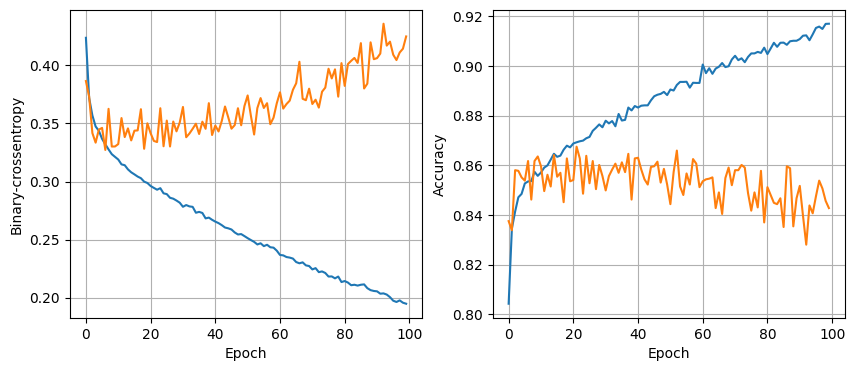

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8477 - loss: 0.4194
Training model with 64 nodes Dropout Probabilty 0 Learninh Rate 0.005 Batch Size 128


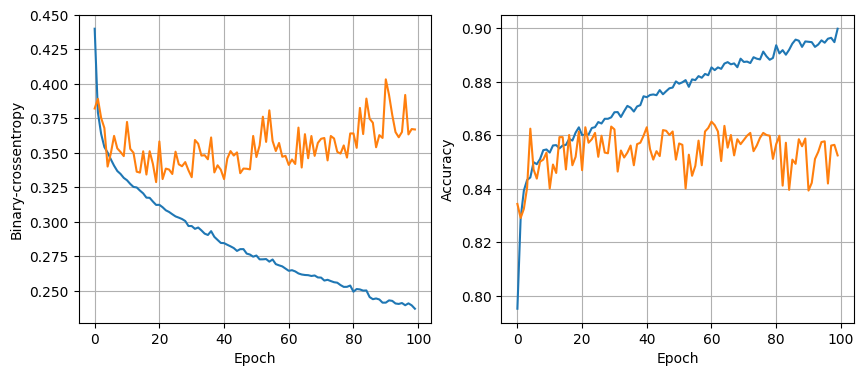

119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8529 - loss: 0.3632
Training model with 64 nodes Dropout Probabilty 0 Learninh Rate 0.001 Batch Size 32


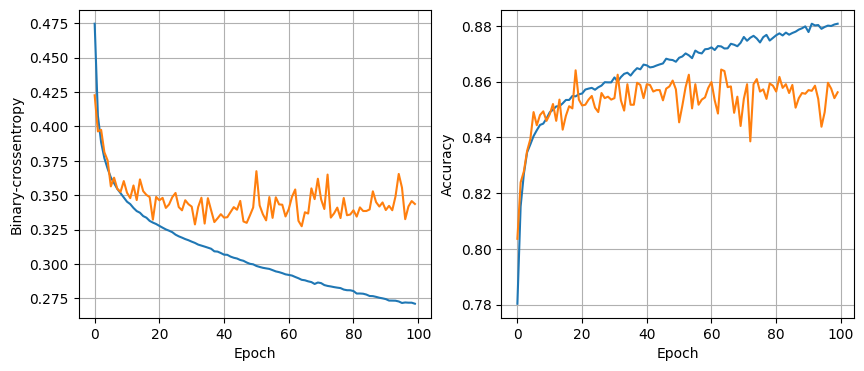

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8542 - loss: 0.3414
Training model with 64 nodes Dropout Probabilty 0 Learninh Rate 0.001 Batch Size 64


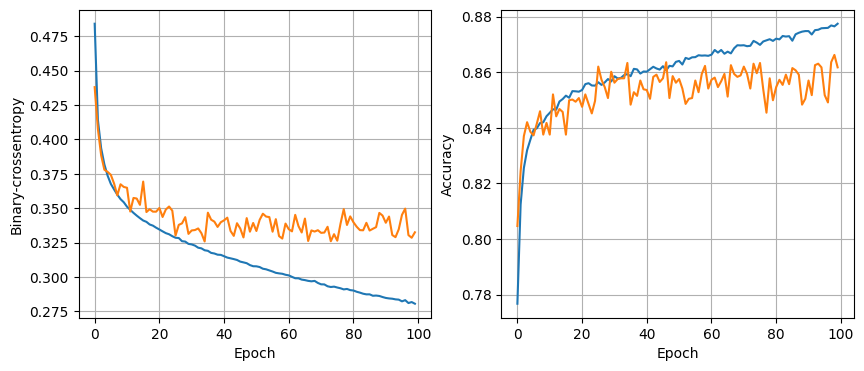

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8648 - loss: 0.3242
Training model with 64 nodes Dropout Probabilty 0 Learninh Rate 0.001 Batch Size 128


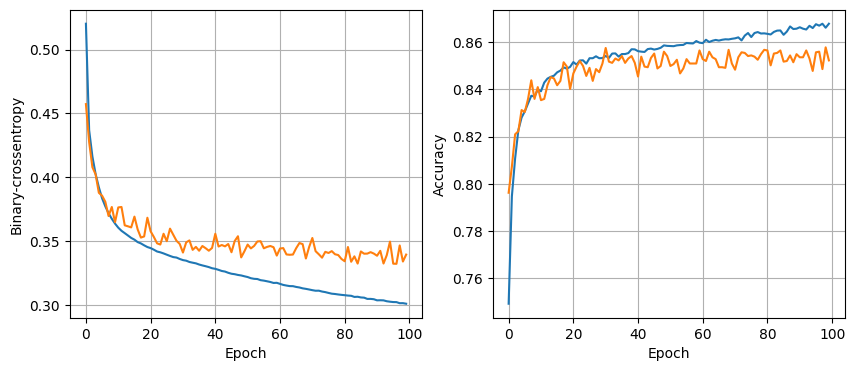

119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8545 - loss: 0.3290
Training model with 64 nodes Dropout Probabilty 0.2 Learninh Rate 0.01 Batch Size 32


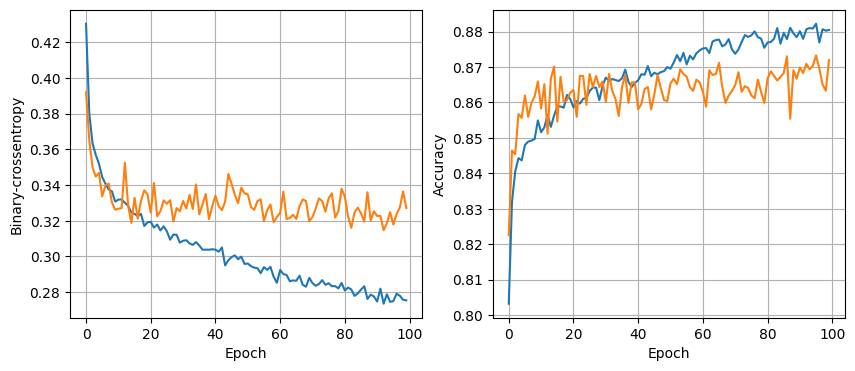

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8753 - loss: 0.3216
Training model with 64 nodes Dropout Probabilty 0.2 Learninh Rate 0.01 Batch Size 64


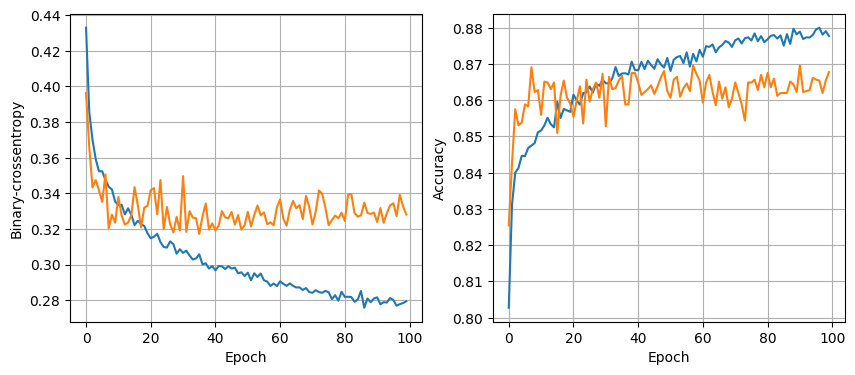

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8727 - loss: 0.3181
Training model with 64 nodes Dropout Probabilty 0.2 Learninh Rate 0.01 Batch Size 128


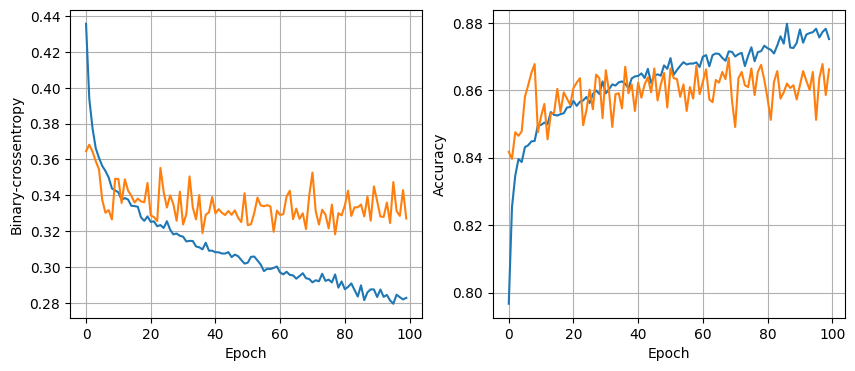

119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8675 - loss: 0.3227
Training model with 64 nodes Dropout Probabilty 0.2 Learninh Rate 0.005 Batch Size 32


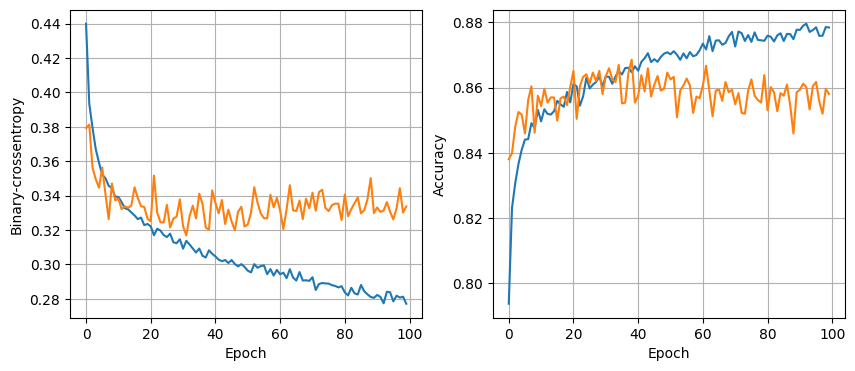

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8590 - loss: 0.3304
Training model with 64 nodes Dropout Probabilty 0.2 Learninh Rate 0.005 Batch Size 64


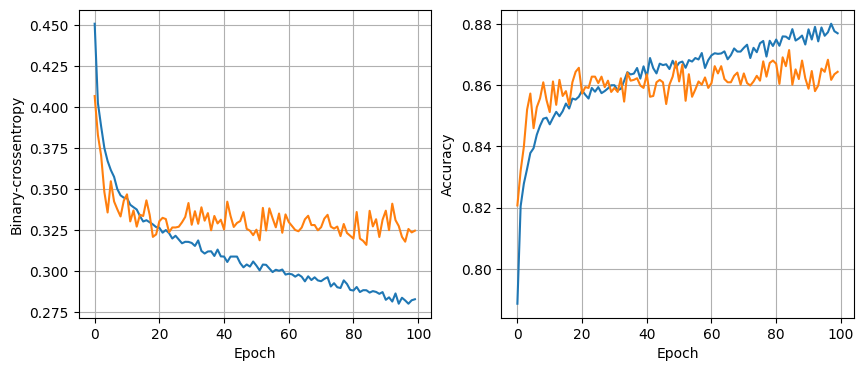

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8667 - loss: 0.3160
Training model with 64 nodes Dropout Probabilty 0.2 Learninh Rate 0.005 Batch Size 128


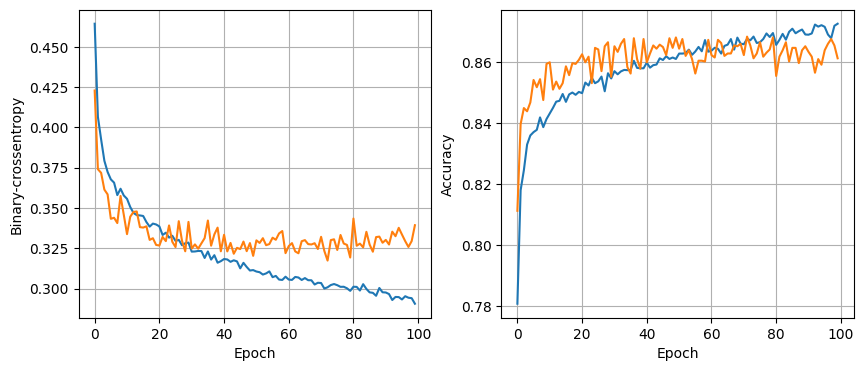

119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8625 - loss: 0.3281
Training model with 64 nodes Dropout Probabilty 0.2 Learninh Rate 0.001 Batch Size 32


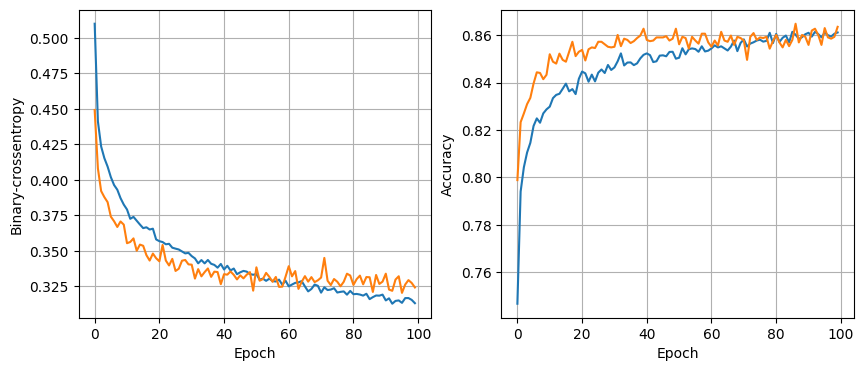

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8666 - loss: 0.3158
Training model with 64 nodes Dropout Probabilty 0.2 Learninh Rate 0.001 Batch Size 64


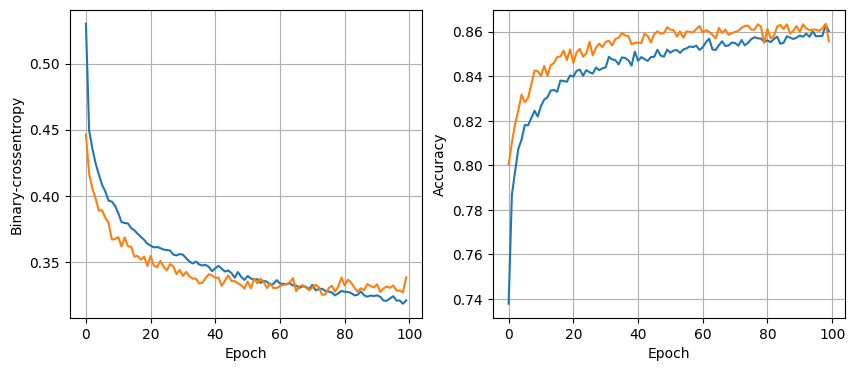

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8601 - loss: 0.3294
Training model with 64 nodes Dropout Probabilty 0.2 Learninh Rate 0.001 Batch Size 128


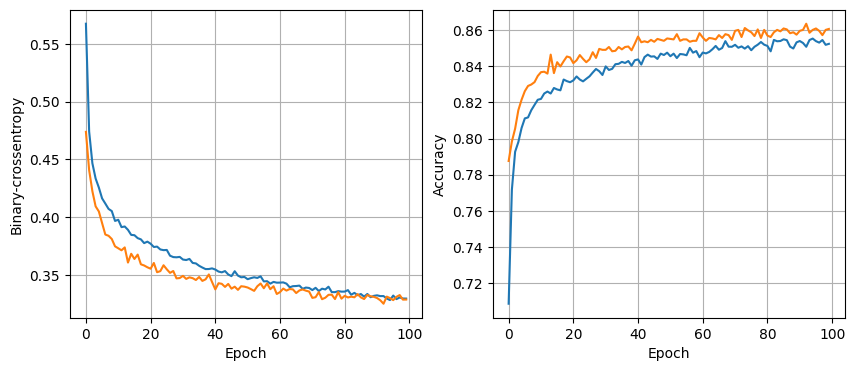

119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8649 - loss: 0.3203


In [26]:
least_val_loss = float('inf')
least_loss_model = None

epochs=100
for num_node in [16,32,64]:
  for dropout_prob in [0, 0.2]:
    for lr in [0.01, 0.005, 0.001]:
      for batch_size in [32,64,128]:
        print(f"Training model with {num_node} nodes Dropout Probabilty {dropout_prob} Learninh Rate {lr} Batch Size {batch_size}")
        model, history = train_model(x_train, y_train, num_node, dropout_prob, lr, batch_size, epochs)
        plot_history(history)
        val_loss = model.evaluate(x_valid, y_valid)[0]
        if val_loss < least_val_loss:
          least_val_loss = val_loss
          least_loss_model = model

In [27]:
y_pred= least_loss_model.predict(x_test)
y_pred = (y_pred > 0.5).astype(int).reshape(-1,)
print(classification_report(y_test, y_pred))

119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
              precision    recall  f1-score   support

           0       0.82      0.80      0.81      1302
           1       0.90      0.91      0.90      2502

    accuracy                           0.87      3804
   macro avg       0.86      0.85      0.86      3804
weighted avg       0.87      0.87      0.87      3804

